<a href="https://colab.research.google.com/github/Kawin101/935442-ImageProcessing/blob/main/Lab06_(31_1_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **บทที่ 4 การตรวจจับวัตถุ (Object detection)**


* **Lab06 (31-1-2023)**
* **4.1 การตรวจจับวัตถุด้วยวิธีการประมวลผลภาพ (Object detection using Image processing)**


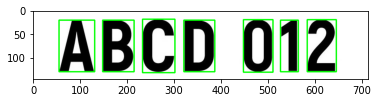

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/3.2 ปี 2566 (ภาคปลาย)/935442_Image-Processing/01car-plate.jpg', 0) # grayscale mode
imgBGR = cv2.imread('/content/drive/MyDrive/3.2 ปี 2566 (ภาคปลาย)/935442_Image-Processing/01car-plate.jpg') # BGR Image 
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
_, binary1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
binary2 = ~ binary1
st = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,3)) #ELLIPSE (วงรีแนวนอน,(5,5)) | (วงรีแนวตั้ง,(5,3))

# ฟังก์ชันการขยายภาพ (Dilation)
binary3 = cv2.dilate(binary2, st, iterations = 1)
objects, hierarchy = cv2.findContours(binary3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for obj in objects: 
  (x,y,w,h) = cv2.boundingRect(obj)
  if (w>25):
	  cv2.rectangle(imgRGB, (x,y), (x+w,y+h), (0,255,0), 2)

# plt.subplot(121), plt.imshow(binary2, cmap='gray') 
# plt.subplot(122), plt.imshow(binary3, cmap='gray') 
plt.imshow(imgRGB, cmap='gray')
plt.show()

* **Lab06 (7-2-2023)**

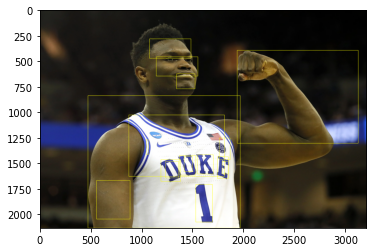

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('/car.png') # Zion face color = R G B (127 107 66)
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# กำหนด ช่วง ค่า สี ที่ เป็นไปได้ ของ วัตถุ หรือ ใบหน้า (ค่าต่ำสุด ค่าสูงสุด)
# Suggess = low_color = (120 100 60), upper_color = (240 240 240) 
lower_color = np.array([60,100,120], dtype='uint8') # BGR
upper_color = np.array([240, 240, 240], dtype='uint8')
obj = cv2.inRange(img, lower_color, upper_color)

st  = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
# iterations ขยายโครงสร้างภาพ หนึ่งครั้ง
obj1 = cv2.dilate(obj, st, iterations=5)

regions, hierarchy = cv2.findContours(obj1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for r in regions:
  (x,y,w,h) = cv2.boundingRect(r)
  if (h>120):
    cv2.rectangle(imgRGB, (x,y), (x+w,y+h), (255,255,0), 2)

plt.imshow(imgRGB)
plt.show()

# plt.imshow(obj1, cmap='gray')
# plt.show()

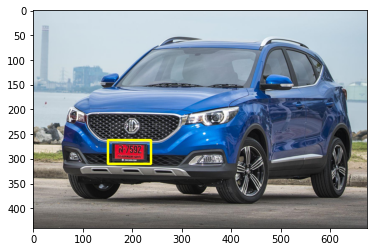

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('/car.png') # Zion face color = R G B (235 9 45)
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# กำหนด ช่วง ค่า สี ที่ เป็นไปได้ ของ วัตถุ หรือ ใบหน้า (ค่าต่ำสุด ค่าสูงสุด)
# Suggess = low_color = (200 5 40), upper_color = (240 240 240) 
lower_color = np.array([0,0,200], dtype='uint8') # BGR
upper_color = np.array([60, 50, 255], dtype='uint8')
obj = cv2.inRange(img, lower_color, upper_color)

st  = cv2.getStructuringElement(cv2.MORPH_RECT,(7,5))
# iterations ขยายโครงสร้างภาพ หนึ่งครั้ง
obj1 = cv2.dilate(obj, st, iterations=5)

regions, hierarchy = cv2.findContours(obj1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for r in regions:
  (x,y,w,h) = cv2.boundingRect(r)
  cv2.rectangle(imgRGB, (x,y), (x+w,y+h), (255,255,0), 3)

plt.imshow(imgRGB)
plt.show()

# plt.imshow(obj1, cmap='gray')
# plt.show()

*   **4.2 ตรวจจับใบหน้าด้วยเอไอ (Object detection_AI)**



In [ ]:
# Non's Success

import cv2
import matplotlib.pyplot as plt
import numpy as np
faceAI = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml") 
image = cv2.imread("/content/x0.jpg")
imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.imread("/content/x0.jpg", 0)


faces = faceAI.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(imgRGB, (x, y), (x+w, y+h),(0, 0, 255), 2)

plt.imshow(imgRGB)
plt.show()


error: ignored